# I. Preprocessing Data





### 1/ Read file form text files

---



In [1]:
def parse_line(line):
    parts = line.strip().split()
    label = parts[0]
    coordinates = [-1 if coord == '#' else float(coord) for coord in parts[1:]]
    return label, coordinates


def read_txt_file(file_path, parse_fn):
    labels = []
    all_coordinates = []

    with open(file_path, 'r', encoding='utf-8') as file:
        for line in file:
            label, coordinates = parse_fn(line)
            if coordinates:  # Check if coordinates list is not empty
                labels.append(label)
                all_coordinates.append(coordinates)
                # print("label:", label, "Coor_:", coordinates)
    return labels, all_coordinates

def split_txt(coordinates, sub_str):
    return [coordinates[i:i + sub_str] for i in range(0, len(coordinates), sub_str)]


# File path
file_path = '/home/ubuntu-vilalab/Desktop/Ham Heng /New dataset/[80%]_Scale_train.txt'
# Read
labels, coordinates_list = read_txt_file(file_path, parse_line)

print("Length of labels:", len(labels))
print("Length of coordinates_list:", len(coordinates_list))
unique_words = set(labels)
num_unique_words = len(unique_words)
print("Number of unique words:", num_unique_words)


# Function find shortest and Longest words
def short_long_label(labels, num_words=10):
    unique_labels = set(labels)
    shortest_labels = sorted(unique_labels, key=len)[:num_words]
    longest_labels = sorted(unique_labels, key=len, reverse=True)[:num_words]
    return shortest_labels, longest_labels


# Find 10 shortest and longest labels
shortest_labels, longest_labels = short_long_label(labels, num_words=50)

print("10 Shortest labels:", shortest_labels)
print("10 Longest labels:", longest_labels)

Length of labels: 40576
Length of coordinates_list: 40576
Number of unique words: 2536
10 Shortest labels: ['ម', 'ត', 'ទ', 'ស', 'ល', 'ឬ', 'ឪ', 'ក', 'ឱ', 'ៗ', 'ឮ', '។', 'ឯ', 'រ', 'ប', 'ន', 'នី', 'ដៃ', 'ផង', 'ជន', 'ឱន', 'ដង', 'វះ', 'បរ', 'គឺ', 'យី', 'សៅ', 'យម', 'ចប', 'យក', 'ជា', 'លះ', 'គង', 'ឆរ', 'ពង', 'ធំ', 'ហា', 'ជើ', 'ពម', 'ណា', 'លា', 'បក', 'រើ', 'លៃ', 'អក', 'ខំ', 'ឯង', 'បទ', 'ទត', 'នែ']
10 Longest labels: ['ពិនិត្យមើល', 'ថ្វាយបង្គំ', 'ជ្រួតជ្រាប', 'ប្រៀបផ្ទឹម', 'ស្លាកស្នាម', 'ព្រះបន្ទូល', 'ស្វែងរកស៊ី', 'ជំនុំស្រេច', 'ខ្លួនខ្ញុំ', 'អ្នកធ្វើជា', 'ចាប់តាំងពី', 'មនុស្សនាក់', 'ប្រើប្រាស់', 'ស្បៀងអាហារ', 'ព្រះឥន្ទ្រ', 'រាជអាមាត្យ', 'តក្កសិលាមក', 'រួមទាំងអស់', 'ខ្សឹកខ្សួល', 'អ្នកក្រមិន', 'ជួបជុំគ្នា', 'ចាប់អាកុហក', 'ពាក្យសម្ដី', 'នាក់សំណាក់', 'ព្រះច្បាប់', 'ខ្លាចក្រែង', 'ទៅជាមួយនឹង', 'កិច្ចសន្យា', 'ស្រួលខ្លួន', 'ព្រះកន្សែង', 'មន្តវិជ្ជា', 'រៀបប្រដាប់', 'ស្មោះត្រង់', 'ចាប់តាំងតែ', 'ធ្វើចម្ការ', 'ប្រណិប័តន៍', 'ពាក្យសន្យា', 'ក្រូចឆ្មារ', 'ការប្រពន្ធ', 'បណ្ណាការជា', 'មនុស្សម្នា', 'ផ្ទះសម្បែង', 

In [2]:
import numpy as np

# Function to split sub-strokes based on the end of stroke marker (-1)
def split_sub_strokes(coords):
    stroke = []
    current_sub_stroke = []

    for coord in coords:
        if coord == -1:
            if current_sub_stroke:
                stroke.append(current_sub_stroke)
                current_sub_stroke = []
        else:
            current_sub_stroke.append(coord)

    if current_sub_stroke:
        stroke.append(current_sub_stroke)

    return stroke


# Calculate the number of strokes for each label and total strokes in the dataset
strokes_per_label = {}
total_strokes = 0

for label, coordinates in zip(labels, coordinates_list):
    stroke = split_sub_strokes(coordinates)
    num_strokes = len(stroke)
    total_strokes += num_strokes

    if label in strokes_per_label:
        strokes_per_label[label].extend(stroke)
    else:
        strokes_per_label[label] = stroke

# Total Strokes in the Dataset
total_strokes = sum(len(strokes) for strokes in strokes_per_label.values())
print("Total Strokes in the Dataset:", total_strokes)

# Total Data Points in the Whole Dataset
total_datapoints = sum(len(stroke) for strokes in strokes_per_label.values() for stroke in strokes)
print("Total Data Points in the Whole Dataset:", total_datapoints)

# Length of Longest Stroke in Dataset
longest_stroke_length = max(len(stroke) for strokes in strokes_per_label.values() for stroke in strokes)
print("Length of Longest Stroke in Dataset:", longest_stroke_length)

# Median Number of Points per Stroke
points_per_stroke = [len(stroke) for strokes in strokes_per_label.values() for stroke in strokes]
median_points_per_stroke = np.median(points_per_stroke)
print("Median Number of Points per Stroke:", median_points_per_stroke)

# Median Number of Strokes per Label
median_strokes_per_label = np.median([len(strokes) for strokes in strokes_per_label.values()])
print("Median Number of Strokes per Label:", median_strokes_per_label)


Total Strokes in the Dataset: 280234
Total Data Points in the Whole Dataset: 54073502
Length of Longest Stroke in Dataset: 1318
Median Number of Points per Stroke: 164.0
Median Number of Strokes per Label: 102.0


Virtualization data

In [3]:
# import matplotlib.pyplot as plt
# import numpy as np

# def visualize_stroke(stroke, label):
#     # Exclude -1 and 0.0 from the sub-stroke
#     stroke = [coord for coord in stroke if coord not in [-1, 0.0]]

#     # Create pairs of x and y coordinates, excluding -1 and 0.0
#     coords_pairs = [(stroke[i], stroke[i + 1]) for i in range(0, len(stroke), 2) if i + 1 < len(stroke)]
#     x_coords, y_coords = zip(*coords_pairs)
#     fig, ax = plt.subplots()
#     ax.scatter(x_coords, y_coords, marker='o', label=f'Stroke - Label: {label}')
#     ax.invert_yaxis()
#     plt.show()

# def visualize_sub_strokes(sub_strokes, label):
#     for stroke in sub_strokes:
#         # Exclude -1 and 0.0 from the sub-stroke
#         stroke = [coord for coord in stroke if coord not in [-1, 0.0]]
#         visualize_stroke(stroke, label)

# def show_data(labels, coordinates_list, sub_str, split_fn, num_labels=2):
#     # Find the maximum length of sub-strokes in the dataset
#     max_sub_stroke_length = max(len(stroke) for coords in coordinates_list for stroke in split_fn(coords, sub_str))

#     # Print data and visualize each sub-stroke for each label
#     for i in range(min(num_labels, len(labels))):
#         label = labels[i]
#         coordinates = coordinates_list[i]
#         sub_strokes = split_fn(coordinates, sub_str)

#         print(f"Label: {label} coor_:{coordinates_list}")

#         # Visualize each sub-stroke for the current label
#         visualize_sub_strokes(sub_strokes, label)

# # Usage
# sub_str = 56
# num_labels = 2
# split_fn = split_txt

# show_data(labels, coordinates_list, sub_str, split_fn, num_labels)

### 2/ Create customDataset

Dictionary for label

---






In [4]:
khmer_dictionary = {
    # khmer_consonants
    '#': 0,
    'ក': 1, 'ខ': 2, 'គ': 3, 'ឃ': 4, 'ង': 5,
    'ច': 6, 'ឆ': 7, 'ជ': 8, 'ឈ': 9, 'ញ': 10,
    'ដ': 11, 'ឋ': 12, 'ឌ': 13, 'ឍ': 14, 'ណ': 15,
    'ត': 16, 'ថ': 17, 'ទ': 18, 'ធ': 19, 'ន': 20,
    'ប': 21, 'ផ': 22, 'ព': 23, 'ភ': 24, 'ម': 25,
    'យ': 26, 'រ': 27, 'ល': 28, 'វ': 29, 'ស': 30,
    'ហ': 31, 'ឡ': 32, 'អ': 33,
    # khmer_dependent_vowels
    'ា': 34, 'ិ': 35, 'ី': 36, 'ឹ': 37, 'ឺ': 38,
    'ុ': 39, 'ូ': 40, 'ួ': 41, 'ើ': 42, 'ឿ': 43,
    'ៀ': 44, 'េ': 45, 'ែ': 46, 'ៃ': 47, 'ោ': 48,
    'ៅ': 49, 'ុំ': 50, 'ំ': 51, 'ាំ': 52, 'ះ': 53, 'ិះ': 54, 'ុះ': 55, 'េះ': 56, 'ោះ': 57,
    # khmer_independent_vowels
    'ឥ': 58, 'ឦ': 59, 'ឧ': 60, 'ឩ': 61, 'ឳ': 62,
    'ឫ': 63, 'ឬ': 64, 'ឭ': 65, 'ឮ': 66, 'ឯ': 67,
    'ឰ': 68, 'ឱ': 69, 'ឪ': 70,'ឲ':71,
    # Special_char
    '៉': 72, '៊': 73, '់': 74, '៌': 75, '៍': 76,
    '៎': 77, '័': 78, '៑': 79, '។': 80, '៕': 81,
    '៖': 82, 'ៗ': 83, '!': 84, '៛': 85, '៏': 86,
    '$': 87, '€': 88, '៙': 89, '៚': 90, '*': 91,'្':92,'ៈ':93,
    # number
    '០': 94, '១': 95, '២': 96, '៣': 97, '៤':98,
    '៥': 99, '៦': 100, '៧': 101, '៨': 102, '៩': 103
}

khmer_dict_reverse = {
    # khmer_consonants
    0: '#',
    1: 'ក', 2: 'ខ', 3: 'គ', 4: 'ឃ', 5: 'ង',
    6: 'ច', 7: 'ឆ', 8: 'ជ', 9: 'ឈ', 10: 'ញ',
    11: 'ដ', 12: 'ឋ', 13: 'ឌ', 14: 'ឍ', 15: 'ណ',
    16: 'ត', 17: 'ថ', 18: 'ទ', 19: 'ធ', 20: 'ន',
    21: 'ប', 22: 'ផ', 23: 'ព', 24: 'ភ', 25: 'ម',
    26: 'យ', 27: 'រ', 28: 'ល', 29: 'វ', 30: 'ស',
    31: 'ហ', 32: 'ឡ', 33: 'អ',
    # khmer_dependent_vowels
    34: 'ា', 35: 'ិ', 36: 'ី', 37: 'ឹ', 38: 'ឺ',
    39: 'ុ', 40: 'ូ', 41: 'ួ', 42: 'ើ', 43: 'ឿ',
    44: 'ៀ', 45: 'េ', 46: 'ែ', 47: 'ៃ', 48: 'ោ',
    49: 'ៅ', 50: 'ុំ', 51: 'ំ', 52: 'ាំ', 53: 'ះ', 54: 'ិះ', 55: 'ុះ', 56: 'េះ', 57: 'ោះ',
    # khmer_independent_vowels
    58: 'ឥ', 59: 'ឦ', 60: 'ឧ', 61: 'ឩ', 62: 'ឳ',
    63: 'ឫ', 64: 'ឬ', 65: 'ឭ', 66: 'ឮ', 67: 'ឯ',
    68: 'ឰ', 69: 'ឱ', 70: 'ឪ', 71: 'ឲ',
    # Special_char
    72: '៉', 73: '៊', 74: '់', 75: '៌', 76: '៍',
    77: '៎', 78: '័', 79: '៑', 80: '។', 81: '៕',
    82: '៖', 83: 'ៗ', 84: '!', 85: '៛', 86: '៏',
    87: '$', 88: '€', 89: '៙', 90: '៚', 91: '*',
    92: '្', 93: 'ៈ',
    # number
    94: '០', 95: '១', 96: '២', 97: '៣', 98: '៤',
    99: '៥', 100: '៦', 101: '៧', 102: '៨', 103: '៩'
}


#Khmer to int

def khmer_to_num(khmer_word, khmer_dict):
    num_list = []
    for khmer_char in khmer_word:
        num_value = khmer_dict.get(khmer_char)
        if num_value is not None:
            num_list.append(num_value)
        else:
            print(f"Warning: '{khmer_char}' not found in the dictionary.")
    return num_list


def num_to_khmer(num_list, khmer_dict_reverse):
    khmer_word = ""
    for num_value in num_list:
        khmer_char = khmer_dict_reverse.get(num_value)
        if khmer_char is not None:
            khmer_word += khmer_char
        else:
            print(f"Warning: Numeric value {num_value} not found in the dictionary.")
    return khmer_word



#-----------​Test-----------
khmer_word = 'ត្រូវចិត្ត'
print("Khmer Word Numbers: ", khmer_to_num(khmer_word, khmer_dictionary))
a=[16, 92, 27, 40, 29, 6, 35, 16, 92, 16]
print('word : ', num_to_khmer(a,khmer_dict_reverse))


print(len(khmer_dictionary))


Khmer Word Numbers:  [16, 92, 27, 40, 29, 6, 35, 16, 92, 16]
word :  ត្រូវចិត្ត
104


CustomDataset

---



In [5]:
import torch
import torch.nn as nn
from torch.nn.utils.rnn import pad_sequence
from torch.utils.data import DataLoader
from torch.utils.data import Dataset


class CustomDataset(Dataset):
    def __init__(self, file_path, sub_str, label_to_index, index_to_label, khmer_dict, parse_fn=parse_line, split_fn=split_txt):
        self.labels, self.coordinates_list = read_txt_file(file_path, parse_fn)
        self.sub_str = sub_str
        self.split_fn = split_fn
        self.label_to_index = label_to_index
        self.index_to_label = index_to_label
        self.khmer_dict = khmer_dict
        self.khmer_to_num = khmer_to_num

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        label = self.labels[idx]
        coordinates = self.coordinates_list[idx]
        coordinates =[coord for coord in coordinates if coord != -1]   # Omit -1
        
        # Split coordinates into sub-strokes
        strokes = self.split_fn(coordinates, self.sub_str)

        # Convert label to index
        label_index = self.khmer_to_num(label, self.label_to_index)

        # Return sub-strokes and label index
        return strokes, label_index

# Create an instance of CustomDataset
dataset = CustomDataset(file_path, sub_str=54, label_to_index=khmer_dictionary, index_to_label=khmer_dict_reverse, khmer_dict=khmer_dictionary)


In [6]:
max_output_length = 0

for input_data, output_data in dataset:
    output_length = len(output_data)
    max_output_length = max(max_output_length, output_length)

print("Maximum output sequence length:", max_output_length)

Maximum output sequence length: 10


In [7]:
import re

# Regular expression pattern for Khmer Unicode range
khmer_pattern = re.compile(r'[\u1780-\u17FF\s]+')

# For label convert into int
for label in dataset.labels:
    if not khmer_pattern.fullmatch(label):
        print(f"Label '{label}' contains a non-Khmer word.")


In [8]:

for label in dataset.labels:
    label_index = dataset.khmer_to_num(label, dataset.label_to_index)
    if label_index is None:
        print(f"Conversion failed for label: {label}")
    else:
        print(f"{label}={label_index}")
        


ប្ដី=[21, 92, 11, 36]
សម្រាក=[30, 25, 92, 27, 34, 1]
ដូចគ្នា=[11, 40, 6, 3, 92, 20, 34]
ជឿជាក់=[8, 43, 8, 34, 1, 74]
អេះ=[33, 45, 53]
រូបរាង=[27, 40, 21, 27, 34, 5]
ព្រះមហេសី=[23, 92, 27, 53, 25, 31, 45, 30, 36]
ស្រក=[30, 92, 27, 1]
ក្ដារម=[1, 92, 11, 34, 27, 25]
ច្រាន=[6, 92, 27, 34, 20]
កំសាក=[1, 51, 30, 34, 1]
ឆ្មា=[7, 92, 25, 34]
បង=[21, 5]
បៀអញ=[21, 44, 33, 10]
បំពាន=[21, 51, 23, 34, 20]
រំពឹង=[27, 51, 23, 37, 5]
គេ=[3, 45]
នាហ្មឺ=[20, 34, 31, 92, 25, 38]
អំបិល=[33, 51, 21, 35, 28]
ឆ្វេង=[7, 92, 29, 45, 5]
ទៅជា=[18, 49, 8, 34]
ញាតិ=[10, 34, 16, 35]
ជើង=[8, 42, 5]
រួច=[27, 41, 6]
ទោម=[18, 48, 25]
គន្ធព្វ=[3, 20, 92, 19, 23, 92, 29]
នៅក្បែរ=[20, 49, 1, 92, 21, 46, 27]
ក្ដាប់=[1, 92, 11, 34, 21, 74]
ធ្យូង=[19, 92, 26, 40, 5]
ច្រាន=[6, 92, 27, 34, 20]
ហ្នមក=[31, 92, 20, 25, 1]
ល្អះ=[28, 92, 33, 53]
ចង្កឹះ=[6, 5, 92, 1, 37, 53]
អម្ពិល=[33, 25, 92, 23, 35, 28]
ទីយម=[18, 36, 26, 25]
ច្រមុះ=[6, 92, 27, 25, 39, 53]
រៀបចំ=[27, 44, 21, 6, 51]
រយះ=[27, 26, 53]
ឱ=[69]
ចាក់=[6, 34, 1, 74]
ស្ទឹង

In [9]:
import torch
import torch.nn.functional as F


def my_collate_fn(batch):
    # Separate sub-strokes and labels
    x, y = zip(*batch)


    max_sub_stroke_length = [max(len(sub_stroke) for sub_stroke in sample_x) for sample_x in x]
    max_length_within_batch = max(max_sub_stroke_length)
    padded_x = []
    for sample_x, max_length in zip(x, max_sub_stroke_length):
        padded_sub_strokes = []
        for sub_stroke in sample_x:
            sub_stroke = [coord for coord in sub_stroke if isinstance(coord, (int, float))]
            pad_length = max_length_within_batch - len(sub_stroke)
            padded_sub_stroke = torch.tensor(sub_stroke + [0] * pad_length)
            padded_sub_strokes.append(padded_sub_stroke)
        padded_sub_strokes = torch.stack(padded_sub_strokes)
        padded_x.append(F.pad(padded_sub_strokes, (0, 0, 0, max_length_within_batch - padded_sub_strokes.size(0))))


    # Stack the padded sub-strokes
    padded_x = torch.stack(padded_x)
    
    # Pad label indices batch to the same length
    padded_y = []
    max_len_label = 10 
    for label in y:
        if isinstance(label, int):
            label = [label]
        padded_label = label[:max_len_label] + [0] * (max_len_label - len(label))
        padded_y.append(padded_label)

    # Stack the padded labels
    padded_y_tensor = torch.tensor(padded_y, dtype=torch.long)

    # Additional padding for 2D tensors (x)
    pad_size = 60
    needed_pad = pad_size - padded_x.size(1)
    padded_2dim= F.pad(padded_x, (0, 0, 0, needed_pad, 0, 0))

    return  padded_2dim , padded_y_tensor

**DATALOADER**

In [10]:
from torch.utils.data import DataLoader

train_loader = DataLoader(dataset, batch_size=32, shuffle=True, collate_fn=my_collate_fn)
for i, (x, y) in enumerate(train_loader):
    print(f"Batch {i}: Input_dim: {x.size()}, Output_dim: {y.size()}")

# '''
# ---------------Task Recognition-------------


# The dimension of input should be [B, N, L].
#     B: batch size,
#     N: number of sub strokes in the entire input word,
#     L: sub stroke length or number of points in each sub stroke


# The output from the model should have dimension [B, N_out, C]
#     B: batch size,
#     N_out: number of characters,
#     C: number of character classes.

# '''

Batch 0: Input_dim: torch.Size([32, 60, 54]), Output_dim: torch.Size([32, 10])
Batch 1: Input_dim: torch.Size([32, 60, 54]), Output_dim: torch.Size([32, 10])
Batch 2: Input_dim: torch.Size([32, 60, 54]), Output_dim: torch.Size([32, 10])
Batch 3: Input_dim: torch.Size([32, 60, 54]), Output_dim: torch.Size([32, 10])
Batch 4: Input_dim: torch.Size([32, 60, 54]), Output_dim: torch.Size([32, 10])
Batch 5: Input_dim: torch.Size([32, 60, 54]), Output_dim: torch.Size([32, 10])
Batch 6: Input_dim: torch.Size([32, 60, 54]), Output_dim: torch.Size([32, 10])
Batch 7: Input_dim: torch.Size([32, 60, 54]), Output_dim: torch.Size([32, 10])
Batch 8: Input_dim: torch.Size([32, 60, 54]), Output_dim: torch.Size([32, 10])
Batch 9: Input_dim: torch.Size([32, 60, 54]), Output_dim: torch.Size([32, 10])
Batch 10: Input_dim: torch.Size([32, 60, 54]), Output_dim: torch.Size([32, 10])
Batch 11: Input_dim: torch.Size([32, 60, 54]), Output_dim: torch.Size([32, 10])
Batch 12: Input_dim: torch.Size([32, 60, 54]), Out

In [11]:
x, y = next(iter(train_loader))

print("Shape of input data:", x.shape)
print("Shape of output data:", y.shape)

Shape of input data: torch.Size([32, 60, 54])
Shape of output data: torch.Size([32, 10])


In [12]:
for batch_idx, (x, y) in enumerate(train_loader):
    print(f"Batch {batch_idx + 1}:")
    print(f"Number of Sequences: {len(y)}")

    for sequence_idx in range(x.size(0)):
        print(f"Label for Sequence {sequence_idx + 1}: {y[sequence_idx].tolist()}")
        print(f"Sub-Strokes for Sequence {sequence_idx + 1}:")
        for sub_stroke_idx in range(x.size(1)):
            print(x[sequence_idx, sub_stroke_idx].tolist())

    break  # Only print the first batch


Batch 1:
Number of Sequences: 32
Label for Sequence 1: [6, 39, 53, 16, 92, 21, 35, 16, 0, 0]
Sub-Strokes for Sequence 1:
[0.3691176474094391, 0.125, 0.3691176474094391, 0.12794117629528046, 0.3691176474094391, 0.13235294818878174, 0.3691176474094391, 0.13823530077934265, 0.3691176474094391, 0.13970588147640228, 0.3691176474094391, 0.14411765336990356, 0.3691176474094391, 0.14852941036224365, 0.3705882430076599, 0.15441176295280457, 0.37205880880355835, 0.15882353484630585, 0.37205880880355835, 0.1617647111415863, 0.3735294044017792, 0.16764706373214722, 0.3735294044017792, 0.1720588207244873, 0.375, 0.17499999701976776, 0.375, 0.1764705926179886, 0.3764705955982208, 0.1823529452085495, 0.3764705955982208, 0.18382352590560913, 0.37794119119644165, 0.1867647022008896, 0.37794119119644165, 0.1882352977991104, 0.37794119119644165, 0.1926470547914505, 0.3794117569923401, 0.19558823108673096, 0.3808823525905609, 0.1985294073820114, 0.3808823525905609, 0.20000000298023224, 0.3808823525905609,

**Virtualization data**

10
[27, 28, 42]
Label: រលើ




/home/ubuntu-vilalab/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


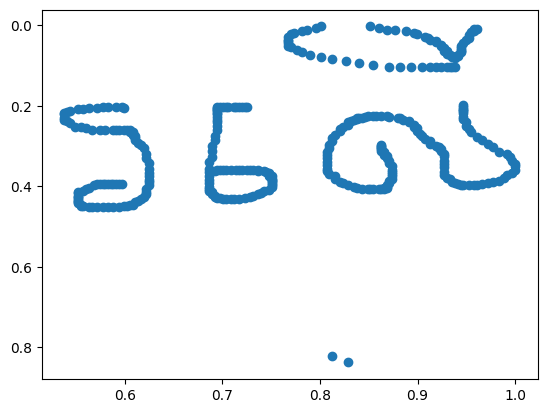

In [13]:
import matplotlib.pyplot as plt
import numpy as np

original_values =  [27, 28, 42, 0, 0, 0, 0, 0, 0, 0]

#____________________LABEL______________________

import numpy as np

#Function argmax
# def argmax(one_hot_vectors):
#     return [np.argmax(vector) for vector in one_hot_vectors]

# original_values = argmax(one_hot_vectors)
# original_values = [np.argmax(vector) for vector in one_hot_vectors]



a=[x for x in original_values if x not in [0]] #remove 0

print(len(original_values))
print(a)

khmer_word = num_to_khmer(a, khmer_dict_reverse)
print("Label:", khmer_word)
print("\n")



#____________________COORDINATES______________________

a1=[0.5966386795043945, 0.3949579894542694, 0.593837559223175, 0.3949579894542694, 0.5910364389419556, 0.3949579894542694, 0.5882353186607361, 0.3949579894542694, 0.5854341983795166, 0.3949579894542694, 0.5826330780982971, 0.3949579894542694, 0.5798319578170776, 0.3949579894542694, 0.5770308375358582, 0.3949579894542694, 0.5742297172546387, 0.3949579894542694, 0.5714285969734192, 0.3949579894542694, 0.5686274766921997, 0.3977591097354889, 0.5630252361297607, 0.40336135029792786, 0.5602241158485413, 0.40616247057914734, 0.5574229955673218, 0.4117647111415863, 0.5518207550048828, 0.4145658314228058, 0.5518207550048828, 0.41736695170402527, 0.5518207550048828, 0.42296919226646423, 0.5518207550048828, 0.4257703125476837, 0.5518207550048828, 0.4285714328289032, 0.5518207550048828, 0.43417367339134216, 0.5518207550048828, 0.43697479367256165, 0.5518207550048828, 0.43977591395378113, 0.5518207550048828, 0.4425770342350006, 0.5546218752861023, 0.4453781545162201, 0.5546218752861023, 0.4481792747974396, 0.5574229955673218, 0.4481792747974396, 0.5630252361297607, 0.45098039507865906, 0.5658263564109802, 0.45098039507865906]
a2=[0.5714285969734192, 0.45098039507865906, 0.5770308375358582, 0.45098039507865906, 0.5826330780982971, 0.45098039507865906, 0.5882353186607361, 0.45098039507865906, 0.593837559223175, 0.45098039507865906, 0.599439799785614, 0.4481792747974396, 0.6022409200668335, 0.4481792747974396, 0.605042040348053, 0.4453781545162201, 0.6078431606292725, 0.4453781545162201, 0.6106442809104919, 0.43977591395378113, 0.6134454011917114, 0.43697479367256165, 0.6162465214729309, 0.4313725531101227, 0.6190476417541504, 0.4257703125476837, 0.6218487620353699, 0.42016807198524475, 0.6218487620353699, 0.4145658314228058, 0.6218487620353699, 0.40616247057914734, 0.6246498823165894, 0.3977591097354889, 0.6246498823165894, 0.38935574889183044, 0.6246498823165894, 0.3837535083293915, 0.6246498823165894, 0.37535014748573303, 0.6246498823165894, 0.3669467866420746, 0.6246498823165894, 0.35574230551719666, 0.6246498823165894, 0.34173670411109924, 0.6218487620353699, 0.3305322229862213, 0.6218487620353699, 0.3193277418613434, 0.6190476417541504, 0.30532214045524597, 0.6162465214729309, 0.2969187796115875, 0.6134454011917114, 0.29131653904914856]
a3=[0.6106442809104919, 0.2857142984867096, 0.6106442809104919, 0.28011205792427063, 0.6106442809104919, 0.27450981736183167, 0.6078431606292725, 0.2717086970806122, 0.6078431606292725, 0.2689075767993927, 0.6078431606292725, 0.2661064565181732, 0.605042040348053, 0.2661064565181732, 0.605042040348053, 0.26330533623695374, 0.605042040348053, 0.26050421595573425, 0.6022409200668335, 0.26050421595573425, 0.599439799785614, 0.26050421595573425, 0.593837559223175, 0.26050421595573425, 0.5910364389419556, 0.26050421595573425, 0.5882353186607361, 0.26050421595573425, 0.5798319578170776, 0.26050421595573425, 0.5742297172546387, 0.26050421595573425, 0.5658263564109802, 0.26050421595573425, 0.5602241158485413, 0.2549019753932953, 0.5546218752861023, 0.2521008551120758, 0.5490196347236633, 0.2521008551120758, 0.5434173941612244, 0.24369747936725616, 0.5406162738800049, 0.2380952388048172, 0.5378151535987854, 0.23529411852359772, 0.5378151535987854, 0.22969187796115875, 0.5378151535987854, 0.2212885171175003, 0.5378151535987854, 0.21848739683628082, 0.5406162738800049, 0.21568627655506134, 0.5434173941612244, 0.21288515627384186]
a4=[0.5518207550048828, 0.2072829157114029, 0.5574229955673218, 0.2072829157114029, 0.5630252361297607, 0.2044817954301834, 0.5714285969734192, 0.2044817954301834, 0.5770308375358582, 0.20168067514896393, 0.5826330780982971, 0.20168067514896393, 0.5910364389419556, 0.20168067514896393, 0.5966386795043945, 0.20168067514896393, 0.599439799785614, 0.2044817954301834, 0.6890756487846375, 0.3613445460796356, 0.6918767690658569, 0.3613445460796356, 0.6946778893470764, 0.35854342579841614, 0.6974790096282959, 0.35854342579841614, 0.7002801299095154, 0.35854342579841614, 0.7030812501907349, 0.35854342579841614, 0.7086834907531738, 0.35854342579841614, 0.7142857313156128, 0.35854342579841614, 0.7170868515968323, 0.35854342579841614, 0.7198879718780518, 0.35854342579841614, 0.7254902124404907, 0.35854342579841614, 0.7282913327217102, 0.35854342579841614, 0.7310924530029297, 0.35854342579841614, 0.7366946935653687, 0.35854342579841614, 0.7366946935653687, 0.3613445460796356, 0.7422969341278076, 0.3613445460796356, 0.7450980544090271, 0.3641456663608551, 0.7478991746902466, 0.3669467866420746, 0.7478991746902466, 0.36974790692329407]
a5=[0.7478991746902466, 0.37254902720451355, 0.7478991746902466, 0.37535014748573303, 0.7507002949714661, 0.37535014748573303, 0.7507002949714661, 0.380952388048172, 0.7507002949714661, 0.3837535083293915, 0.7507002949714661, 0.38655462861061096, 0.7507002949714661, 0.38935574889183044, 0.7507002949714661, 0.3949579894542694, 0.7507002949714661, 0.3977591097354889, 0.7507002949714661, 0.4005602300167084, 0.7478991746902466, 0.4089635908603668, 0.7422969341278076, 0.4117647111415863, 0.7394958138465881, 0.41736695170402527, 0.7366946935653687, 0.42016807198524475, 0.7310924530029297, 0.42296919226646423, 0.7282913327217102, 0.4257703125476837, 0.7226890921592712, 0.4285714328289032, 0.7170868515968323, 0.4313725531101227, 0.7114846110343933, 0.4313725531101227, 0.7086834907531738, 0.4313725531101227, 0.7030812501907349, 0.4313725531101227, 0.7002801299095154, 0.4313725531101227, 0.6974790096282959, 0.4285714328289032, 0.6946778893470764, 0.4285714328289032, 0.6918767690658569, 0.4257703125476837, 0.6918767690658569, 0.42296919226646423, 0.6890756487846375, 0.42016807198524475, 0.6890756487846375, 0.4145658314228058]
a6=[0.686274528503418, 0.4117647111415863, 0.686274528503418, 0.40616247057914734, 0.686274528503418, 0.4005602300167084, 0.686274528503418, 0.3921568691730499, 0.686274528503418, 0.3837535083293915, 0.686274528503418, 0.37535014748573303, 0.686274528503418, 0.3641456663608551, 0.686274528503418, 0.35574230551719666, 0.686274528503418, 0.33893558382987976, 0.6890756487846375, 0.32773110270500183, 0.6890756487846375, 0.31092438101768494, 0.6890756487846375, 0.299719899892807, 0.6918767690658569, 0.2857142984867096, 0.6918767690658569, 0.27450981736183167, 0.6946778893470764, 0.26050421595573425, 0.6946778893470764, 0.24929971992969513, 0.6946778893470764, 0.24089635908603668, 0.6946778893470764, 0.23529411852359772, 0.6946778893470764, 0.22689075767993927, 0.6946778893470764, 0.2212885171175003, 0.6946778893470764, 0.21848739683628082, 0.6946778893470764, 0.21288515627384186, 0.6946778893470764, 0.21008403599262238, 0.6946778893470764, 0.2072829157114029, 0.6946778893470764, 0.2044817954301834, 0.6946778893470764, 0.20168067514896393, 0.6974790096282959, 0.20168067514896393, 0.7002801299095154, 0.20168067514896393]
a7=[0.7030812501907349, 0.20168067514896393, 0.7058823704719543, 0.20168067514896393, 0.7114846110343933, 0.20168067514896393, 0.7142857313156128, 0.20168067514896393, 0.7170868515968323, 0.20168067514896393, 0.7198879718780518, 0.20168067514896393, 0.7226890921592712, 0.20168067514896393, 0.7254902124404907, 0.20168067514896393, 0.8627451062202454, 0.2969187796115875, 0.8627451062202454, 0.299719899892807, 0.8627451062202454, 0.3025210201740265, 0.8627451062202454, 0.30532214045524597, 0.8627451062202454, 0.30812326073646545, 0.8627451062202454, 0.31092438101768494, 0.8655462265014648, 0.3137255012989044, 0.8655462265014648, 0.3165266215801239, 0.8655462265014648, 0.32212886214256287, 0.8683473467826843, 0.32492998242378235, 0.8683473467826843, 0.3305322229862213, 0.8711484670639038, 0.3361344635486603, 0.8711484670639038, 0.34173670411109924, 0.8739495873451233, 0.3501400649547577, 0.8739495873451233, 0.35854342579841614, 0.8739495873451233, 0.3641456663608551, 0.8739495873451233, 0.36974790692329407, 0.8739495873451233, 0.37535014748573303, 0.8739495873451233, 0.380952388048172, 0.8711484670639038, 0.38655462861061096]
a8=[0.8711484670639038, 0.3921568691730499, 0.8683473467826843, 0.3977591097354889, 0.8683473467826843, 0.4005602300167084, 0.8683473467826843, 0.40336135029792786, 0.8655462265014648, 0.40336135029792786, 0.8655462265014648, 0.40616247057914734, 0.8627451062202454, 0.40616247057914734, 0.8599439859390259, 0.40616247057914734, 0.8543417453765869, 0.40616247057914734, 0.8515406250953674, 0.40616247057914734, 0.848739504814148, 0.40616247057914734, 0.843137264251709, 0.40616247057914734, 0.83753502368927, 0.40336135029792786, 0.8347339034080505, 0.4005602300167084, 0.8291316628456116, 0.3977591097354889, 0.8235294222831726, 0.3921568691730499, 0.8207283020019531, 0.38935574889183044, 0.8151260614395142, 0.380952388048172, 0.8151260614395142, 0.37535014748573303, 0.8095238208770752, 0.36974790692329407, 0.8067227005958557, 0.3613445460796356, 0.8067227005958557, 0.35574230551719666, 0.8067227005958557, 0.3473389446735382, 0.8067227005958557, 0.33893558382987976, 0.8067227005958557, 0.3305322229862213, 0.8067227005958557, 0.32212886214256287, 0.8067227005958557, 0.3137255012989044, 0.8095238208770752, 0.30532214045524597]
a9=[0.8095238208770752, 0.2969187796115875, 0.8123249411582947, 0.2885154187679291, 0.8123249411582947, 0.28011205792427063, 0.8151260614395142, 0.2717086970806122, 0.8207283020019531, 0.26330533623695374, 0.8207283020019531, 0.25770309567451477, 0.8235294222831726, 0.2521008551120758, 0.8291316628456116, 0.24649859964847565, 0.8291316628456116, 0.24089635908603668, 0.831932783126831, 0.2380952388048172, 0.8347339034080505, 0.23529411852359772, 0.83753502368927, 0.23249299824237823, 0.83753502368927, 0.22969187796115875, 0.8403361439704895, 0.22969187796115875, 0.843137264251709, 0.22969187796115875, 0.8459383845329285, 0.22689075767993927, 0.848739504814148, 0.2240896373987198, 0.8543417453765869, 0.2240896373987198, 0.8571428656578064, 0.2240896373987198, 0.8627451062202454, 0.2240896373987198, 0.8683473467826843, 0.2240896373987198, 0.8711484670639038, 0.22689075767993927, 0.8795518279075623, 0.22969187796115875, 0.8823529481887817, 0.22969187796115875, 0.8851540684700012, 0.23529411852359772, 0.8907563090324402, 0.2380952388048172, 0.8907563090324402, 0.24089635908603668, 0.8963585495948792, 0.24649859964847565]
a10=[0.8963585495948792, 0.2521008551120758, 0.8991596698760986, 0.2549019753932953, 0.8991596698760986, 0.26330533623695374, 0.9019607901573181, 0.2689075767993927, 0.9047619104385376, 0.27450981736183167, 0.9075630307197571, 0.2829131782054901, 0.913165271282196, 0.2885154187679291, 0.913165271282196, 0.29411765933036804, 0.918767511844635, 0.299719899892807, 0.9215686321258545, 0.3025210201740265, 0.9215686321258545, 0.30532214045524597, 0.924369752407074, 0.30812326073646545, 0.924369752407074, 0.31092438101768494, 0.9271708726882935, 0.3193277418613434, 0.9271708726882935, 0.32492998242378235, 0.9271708726882935, 0.3361344635486603, 0.9271708726882935, 0.3445378243923187, 0.9271708726882935, 0.3529411852359772, 0.9271708726882935, 0.3641456663608551, 0.9271708726882935, 0.37254902720451355, 0.9299719929695129, 0.3781512677669525, 0.9327731132507324, 0.380952388048172, 0.9355742335319519, 0.38935574889183044, 0.9383753538131714, 0.3921568691730499, 0.9411764740943909, 0.3949579894542694, 0.9439775943756104, 0.3977591097354889, 0.9467787146568298, 0.3977591097354889, 0.9523809552192688, 0.3977591097354889]
a11=[0.9579831957817078, 0.3977591097354889, 0.9607843160629272, 0.3977591097354889, 0.9663865566253662, 0.3949579894542694, 0.9719887971878052, 0.3921568691730499, 0.9775910377502441, 0.38935574889183044, 0.9831932783126831, 0.38655462861061096, 0.9887955188751221, 0.3781512677669525, 0.9915966391563416, 0.37254902720451355, 0.9971988797187805, 0.3669467866420746, 1.0, 0.35854342579841614, 1.0, 0.3501400649547577, 1.0, 0.3445378243923187, 0.9971988797187805, 0.3361344635486603, 0.994397759437561, 0.32773110270500183, 0.9915966391563416, 0.3193277418613434, 0.9831932783126831, 0.3137255012989044, 0.9775910377502441, 0.3025210201740265, 0.9719887971878052, 0.29411765933036804, 0.9663865566253662, 0.2857142984867096, 0.9607843160629272, 0.27731093764305115, 0.9551820755004883, 0.2661064565181732, 0.9523809552192688, 0.25770309567451477, 0.9495798349380493, 0.24929971992969513, 0.9495798349380493, 0.24089635908603668, 0.9467787146568298, 0.23249299824237823, 0.9467787146568298, 0.22689075767993927, 0.9467787146568298, 0.21848739683628082, 0.9467787146568298, 0.21288515627384186]
a12=[0.9467787146568298, 0.21008403599262238, 0.9467787146568298, 0.2072829157114029, 0.9467787146568298, 0.20168067514896393, 0.9467787146568298, 0.19887955486774445, 0.9383753538131714, 0.10364145785570145, 0.9355742335319519, 0.10364145785570145, 0.9327731132507324, 0.10364145785570145, 0.9299719929695129, 0.10364145785570145, 0.924369752407074, 0.10364145785570145, 0.918767511844635, 0.10364145785570145, 0.913165271282196, 0.10364145785570145, 0.9047619104385376, 0.10364145785570145, 0.8935574293136597, 0.10364145785570145, 0.8823529481887817, 0.10364145785570145, 0.8711484670639038, 0.10364145785570145, 0.8543417453765869, 0.09803921729326248, 0.8403361439704895, 0.09243697673082352, 0.8263305425643921, 0.08963585644960403, 0.8123249411582947, 0.08403361588716507, 0.8011204600334167, 0.0784313753247261, 0.7899159789085388, 0.07282913476228714, 0.7815126180648804, 0.06722689419984818, 0.7759103775024414, 0.06162464991211891, 0.7703081369400024, 0.053221289068460464, 0.767507016658783, 0.05042016878724098, 0.767507016658783, 0.04481792822480202, 0.767507016658783, 0.03921568766236305, 0.767507016658783, 0.03641456738114357]
a13=[0.767507016658783, 0.028011204674839973, 0.7703081369400024, 0.02240896411240101, 0.7731092572212219, 0.019607843831181526, 0.7815126180648804, 0.014005602337419987, 0.7871148586273193, 0.011204482056200504, 0.7955182194709778, 0.005602241028100252, 0.8011204600334167, 0.002801120514050126, 0.8123249411582947, 0.0, 0.8207283020019531, 0.0, 0.8291316628456116, 0.0, 0.83753502368927, 0.0, 0.8515406250953674, 0.002801120514050126, 0.8599439859390259, 0.005602241028100252, 0.8683473467826843, 0.011204482056200504, 0.8767507076263428, 0.011204482056200504, 0.8879551887512207, 0.014005602337419987, 0.8963585495948792, 0.019607843831181526, 0.8991596698760986, 0.02240896411240101, 0.9075630307197571, 0.028011204674839973, 0.9103641510009766, 0.030812324956059456, 0.913165271282196, 0.03641456738114357, 0.918767511844635, 0.03921568766236305, 0.918767511844635, 0.042016807943582535, 0.924369752407074, 0.0476190485060215, 0.924369752407074, 0.05042016878724098, 0.9271708726882935, 0.05602240934967995, 0.9271708726882935, 0.05882352963089943, 0.9271708726882935, 0.06442577391862869]
a14=[0.9299719929695129, 0.06442577391862869, 0.9299719929695129, 0.07002801448106766, 0.9327731132507324, 0.07282913476228714, 0.9355742335319519, 0.07563025504350662, 0.9355742335319519, 0.0784313753247261, 0.9383753538131714, 0.0784313753247261, 0.9383753538131714, 0.08123249560594559, 0.9383753538131714, 0.0784313753247261, 0.9411764740943909, 0.07563025504350662, 0.9411764740943909, 0.07282913476228714, 0.9439775943756104, 0.06722689419984818, 0.9439775943756104, 0.06442577391862869, 0.9439775943756104, 0.06162464991211891, 0.9439775943756104, 0.05602240934967995, 0.9439775943756104, 0.05042016878724098, 0.9467787146568298, 0.04481792822480202, 0.9495798349380493, 0.03641456738114357, 0.9523809552192688, 0.030812324956059456, 0.9523809552192688, 0.02521008439362049, 0.9551820755004883, 0.016806723549962044, 0.9579831957817078, 0.014005602337419987, 0.9579831957817078, 0.011204482056200504, 0.9579831957817078, 0.008403361774981022, 0.9607843160629272, 0.008403361774981022, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

#________________PLOT_______________

sub_stroke = a1+a2+a3+a4+a5+a6+a7+a8+a9+a10+a11+a12+a13+a14
# clean 0
sub_stroke = [value for value in sub_stroke if value not in [0.0]]
# Reshape the flat list into pairs of (x, y)
x_coords = sub_stroke[::2]   # even index
y_coords = sub_stroke[1::2]  # odd index

fig, ax = plt.subplots()
ax.scatter(x_coords, y_coords)
# Invert the y-axis
ax.invert_yaxis()

plt.show()

# Model

Model Bi-LSTM

In [14]:
import torch
import torch.nn as nn

class Encoder(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, dropout):
        super().__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_size, hidden_size // 2, num_layers=num_layers, 
                            batch_first=True, dropout=dropout, bidirectional=True)

    def forward(self, x):
        # x shape: (batch_size, seq_len, n_features)
        outputs, (h, c) = self.lstm(x)
        # Concatenate the hidden states for both directions
        h = torch.cat((h[-2], h[-1]), dim=1)
        return outputs, h

class Decoder(nn.Module):
    def __init__(self, hidden_size, max_label_length, num_classes, num_layers, dropout):
        super().__init__()
        self.hidden_size = hidden_size
        self.max_label_length = max_label_length
        self.num_classes = num_classes
        self.num_layers = num_layers
        self.lstm = nn.LSTM(hidden_size, hidden_size, num_layers=num_layers, 
                            batch_first=True, dropout=dropout)
        self.out_layer = nn.Linear(hidden_size, num_classes)

    def forward(self, h, encoder_output):
        # Prepare initial states
        h = h.unsqueeze(0).repeat(self.num_layers, 1, 1)  # Repeat for each layer
        c = torch.zeros_like(h)  # Initial cell states
        # Prepare decoder inputs, initial hidden state only, inputs will be generated
        inputs = torch.zeros(encoder_output.size(0), self.max_label_length, self.hidden_size).to(h.device)
        outputs, (hn, cn) = self.lstm(inputs, (h, c))
        outputs = self.out_layer(outputs)
        outputs = outputs.transpose(1, 2)

        return outputs

class EncoderDecoder(nn.Module):
    def __init__(self, encoder, decoder):
        super().__init__()
        self.encoder = encoder
        self.decoder = decoder

    def forward(self, x):
        encoder_output, last_hidden_state = self.encoder(x)
        decoder_output = self.decoder(last_hidden_state, encoder_output)
        return decoder_output



# Define the dimensions
hidden_size = 1024
batch_size = 32
num_substrokes = 60
substroke_length = 54
num_classes = 104
max_label_length = 10
dropout= 0.2
num_layer= 3


encoder = Encoder(input_size=substroke_length, hidden_size=hidden_size, num_layers=num_layer, dropout=dropout)
decoder = Decoder(hidden_size=hidden_size, max_label_length=max_label_length, num_classes=num_classes, num_layers=num_layer, dropout=dropout)
model = EncoderDecoder(encoder, decoder)

# Check for GPU availability
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Device:", device)

model=model.to(device)

print("Model architecture:")
print(model, '\n')

# Test the updated model
input_tensor = torch.randn(batch_size, num_substrokes, substroke_length).to(device)
output = model(input_tensor)
print("Output shape:", output.shape)  
# Expected Shape: (batch_size,, num_classes, max_label_length)
# (32,106,18)



Device: cuda
Model architecture:
EncoderDecoder(
  (encoder): Encoder(
    (lstm): LSTM(54, 512, num_layers=3, batch_first=True, dropout=0.2, bidirectional=True)
  )
  (decoder): Decoder(
    (lstm): LSTM(1024, 1024, num_layers=3, batch_first=True, dropout=0.2)
    (out_layer): Linear(in_features=1024, out_features=104, bias=True)
  )
) 

Output shape: torch.Size([32, 104, 10])


5/ Training

In [15]:
file_path = '/home/ubuntu-vilalab/Desktop/Ham Heng /New dataset/[80%]_Scale_train.txt'
dataset_train = CustomDataset(file_path, sub_str=54, label_to_index=khmer_dictionary, index_to_label=khmer_dict_reverse, khmer_dict=khmer_dictionary)
train_loader = DataLoader(dataset_train, batch_size=32, shuffle=True, collate_fn= my_collate_fn)

In [16]:
import torch
import torch.nn as nn
import torch.optim as optim

learning_rate = 0.001
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
n_epochs = 100
losses = []

coss_function = nn.CrossEntropyLoss()

for epoch in range(n_epochs):
    for i, (b_x, b_y) in enumerate(train_loader):

        b_x=b_x.to(device)
        b_y=b_y.to(device)


        d_output = model(b_x)  
        
        # print(d_output.shape)
        # print(b_y.shape)  

        loss = coss_function(d_output, b_y)
        
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
        

        if i % 100 == 0:
            print('Epoch: %03d, i: %03d, Loss: %.10f' % (epoch, i, loss.item()))

        losses.append(loss.item())

# Save the model 
torch.save(model.state_dict(), f"model_epoch_{epoch+1}_new_dataset1.1.pth")



Epoch: 000, i: 000, Loss: 4.6408882141
Epoch: 000, i: 100, Loss: 1.9126542807
Epoch: 000, i: 200, Loss: 2.2596809864
Epoch: 000, i: 300, Loss: 1.8191406727
Epoch: 000, i: 400, Loss: 1.8837493658
Epoch: 000, i: 500, Loss: 1.6770293713
Epoch: 000, i: 600, Loss: 2.0051233768
Epoch: 000, i: 700, Loss: 1.6721174717
Epoch: 000, i: 800, Loss: 1.6725422144
Epoch: 000, i: 900, Loss: 1.9815641642
Epoch: 000, i: 1000, Loss: 2.0612306595
Epoch: 000, i: 1100, Loss: 1.8843904734
Epoch: 000, i: 1200, Loss: 2.0228779316
Epoch: 001, i: 000, Loss: 1.7364196777
Epoch: 001, i: 100, Loss: 1.9319889545
Epoch: 001, i: 200, Loss: 1.7419389486
Epoch: 001, i: 300, Loss: 1.5400002003
Epoch: 001, i: 400, Loss: 1.9474821091
Epoch: 001, i: 500, Loss: 1.6432689428
Epoch: 001, i: 600, Loss: 1.7600075006
Epoch: 001, i: 700, Loss: 1.7868410349
Epoch: 001, i: 800, Loss: 1.5590958595
Epoch: 001, i: 900, Loss: 1.7104820013
Epoch: 001, i: 1000, Loss: 1.6736307144
Epoch: 001, i: 1100, Loss: 1.3840055466
Epoch: 001, i: 1200,

6/ Plot Cost function or Loss

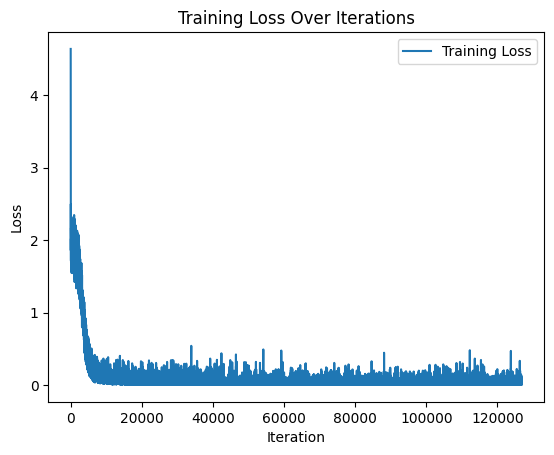

In [17]:
import matplotlib.pyplot as plt

plt.plot(losses, label='Training Loss')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Training Loss Over Iterations')
plt.legend()
plt.show()

7/ Evaluate 

In [18]:
file_path_test = '/home/ubuntu-vilalab/Desktop/Ham Heng /New dataset/[10%]_Scale_testing_data.txt'
data_test = CustomDataset(file_path_test, sub_str=54, label_to_index=khmer_dictionary, index_to_label=khmer_dict_reverse, khmer_dict=khmer_dictionary)
test_loader = DataLoader(data_test, batch_size=32, shuffle=True, collate_fn=my_collate_fn)

In [19]:
file_path_Train = '/home/ubuntu-vilalab/Desktop/Ham Heng /New dataset/[80%]_Scale_train.txt'
data_train = CustomDataset(file_path_Train, sub_str=54, label_to_index=khmer_dictionary, index_to_label=khmer_dict_reverse, khmer_dict=khmer_dictionary)
train_loader = DataLoader(data_train, batch_size=32, shuffle=True, collate_fn=my_collate_fn)

In [20]:
file_path_valid= '/home/ubuntu-vilalab/Desktop/Ham Heng /New dataset/[10%]_Scale_validation_data.txt'
data_valid = CustomDataset(file_path_valid, sub_str=54, label_to_index=khmer_dictionary, index_to_label=khmer_dict_reverse, khmer_dict=khmer_dictionary)
valid_loader = DataLoader(data_valid, batch_size=32, shuffle=True, collate_fn=my_collate_fn)

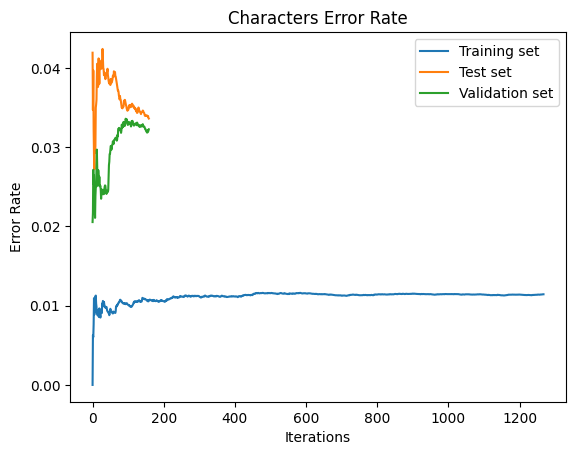

Final Characters Error Rate on Training set: 0.0114
Final Characters Error Rate on Test set: 0.0336
Final Characters Error Rate on Validation set: 0.0322


In [21]:
import matplotlib.pyplot as plt
import torch

# Function to compute error rates
def compute_error_rates(loader, model, device):
    n_err = 0
    total_samples = 0
    error_rates = []

    for b_x, b_y in loader:
        b_x = b_x.to(device).to(torch.float32)
        b_y = b_y.to(device)
        output = model(b_x)
        predict = torch.argmax(output, dim=1)
        mask = (b_y != 0)
        n_err += ((predict[mask] != b_y[mask]).sum().item())
        total_samples += mask.sum().item()  # Count only non-padded samples
        error_rate = n_err / total_samples
        error_rates.append(error_rate)

    return error_rates

# Assuming model, device, train_loader, test_loader, and valid_loader are defined
train_error_rates = compute_error_rates(train_loader, model, device)
test_error_rates = compute_error_rates(test_loader, model, device)
valid_error_rates = compute_error_rates(valid_loader, model, device)

# Plot the error rates
plt.plot(train_error_rates, label='Training set')
plt.plot(test_error_rates, label='Test set')
plt.plot(valid_error_rates, label='Validation set')
plt.xlabel('Iterations')
plt.ylabel('Error Rate')
plt.title('Characters Error Rate')
plt.legend()
plt.show()

# Print the final error rates
print('Final Characters Error Rate on Training set: %.4f' % train_error_rates[-1])
print('Final Characters Error Rate on Test set: %.4f' % test_error_rates[-1])
print('Final Characters Error Rate on Validation set: %.4f' % valid_error_rates[-1])


# Test Result : 

In [22]:
# n_err = 0
total_words = 0
correct_words = 0
incorrect_words = 0

for b_x, b_y in test_loader:
    b_x=b_x.to(device)
    b_y=b_y.to(device)
    output = model(b_x)
    predict = torch.argmax(output, dim=1)
    # n_err += (predict != b_y).sum().item()
    
    for i in range(len(b_y)):
        
        padding_mask = (b_y[i] != 0)
        
        # Apply the padding mask to exclude padding from counting
        ground_truth = num_to_khmer(b_y[i][padding_mask].tolist(), khmer_dict_reverse)
        predicted = num_to_khmer(predict[i][padding_mask].tolist(), khmer_dict_reverse)

        # Count total words excluding padding
        total_words += padding_mask.sum().item()

        # Check if the prediction is correct, excluding padding
        if (b_y[i][padding_mask] == predict[i][padding_mask]).all():
            correct_words += padding_mask.sum().item()
        else:
            incorrect_words += padding_mask.sum().item()

        # Print information for each word
        print("Numeric value in b_y:", b_y[i][padding_mask].tolist())
        print("Numeric value in predict:", predict[i][padding_mask].tolist())
        print("Ground Truth:", ground_truth)
        print("Predicted:", predicted)
        print()

print('Total Words (excluding padding):', total_words)
print('Correct Words (excluding padding):', correct_words)
print('Incorrect Words (excluding padding):', incorrect_words)


Numeric value in b_y: [9, 40, 1]
Numeric value in predict: [9, 40, 1]
Ground Truth: ឈូក
Predicted: ឈូក

Numeric value in b_y: [24, 78, 23, 92, 29]
Numeric value in predict: [24, 78, 23, 92, 29]
Ground Truth: ភ័ព្វ
Predicted: ភ័ព្វ

Numeric value in b_y: [29, 34, 26, 1]
Numeric value in predict: [29, 34, 26, 1]
Ground Truth: វាយក
Predicted: វាយក

Numeric value in b_y: [16, 92, 27, 32, 21, 74]
Numeric value in predict: [16, 92, 27, 32, 21, 74]
Ground Truth: ត្រឡប់
Predicted: ត្រឡប់

Numeric value in b_y: [20, 34, 51]
Numeric value in predict: [20, 34, 51]
Ground Truth: នាំ
Predicted: នាំ

Numeric value in b_y: [30, 92, 1, 27]
Numeric value in predict: [30, 92, 1, 27]
Ground Truth: ស្ករ
Predicted: ស្ករ

Numeric value in b_y: [16, 41]
Numeric value in predict: [16, 41]
Ground Truth: តួ
Predicted: តួ

Numeric value in b_y: [22, 92, 3, 39, 51]
Numeric value in predict: [22, 92, 3, 39, 51]
Ground Truth: ផ្គុំ
Predicted: ផ្គុំ

Numeric value in b_y: [25, 42, 28]
Numeric value in predict: [25, 